# Novel Enhanced Quantum Representation (NEQR) of Digital Images

The NEQR (Novel Enhanced Quantum Representation) is an advancement in quantum image representation compared to its predecessor FRQI. It improves on FRQI by using qubit sequences to store grayscale values, enabling complex image transformations and operations. NEQR offers advantages such as faster image preparation, optimal comrpession ratio, precise image retrieval, and support for complex operations. 

## [1] Cataract Image Pre-processing 

In this context, a sample cataract image serves as the subject of analysis. The image was sujected to a conversion from the BGR to grayscale format, resulting in the confinement of pixel intensities within a scale of 0 to 255, effectively representing an array of gray shades. To streamline the implementation of basic algorithms, the image dimensions were simplified to a 4x4 scale. 

In [18]:
# Import necessary libraries 
import cv2 as cv 
import matplotlib.pyplot as plt 
%matplotlib inline

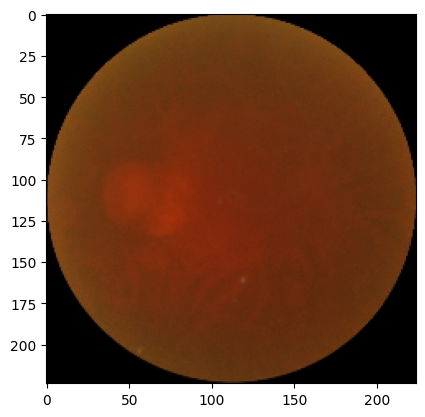

In [19]:
# Import image
img = cv.imread('image16.png')

# Visualize image using matplotlib [BGR format]
plt.imshow(img)
plt.show()

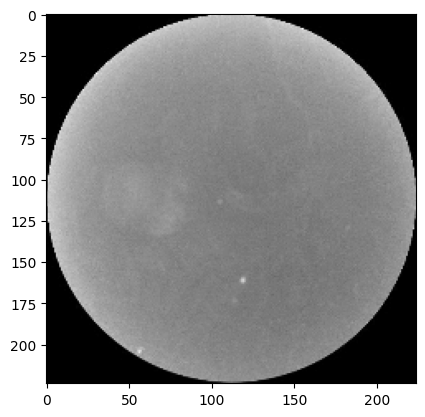

In [20]:
# Import image using grayscale format 
gray_img = cv.imread('image16.png', cv.IMREAD_GRAYSCALE)

# Visualize grayscale image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [21]:
# Acquire the dimensions of the original image for reference
width = gray_img.shape[1]
height = gray_img.shape[0]

print(f'Original Dimensions : {height} x {width}')

Original Dimensions : 224 x 224


Resized Dimensions : 4 x 4


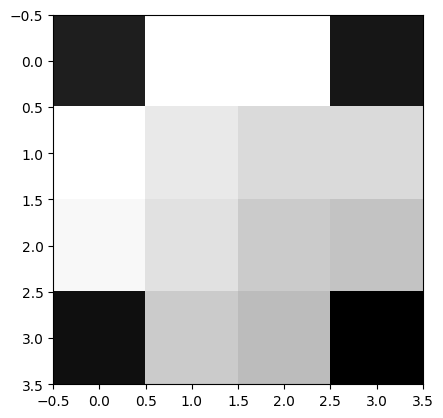

In [22]:
# Resize the image to 4 x 4
# resized_img = cv.resize(gray_img, (4, 4), interpolation=cv.INTER_NEAREST)
resized_img = cv.resize(gray_img, (4, 4), interpolation=cv.INTER_AREA)

# Acquire the dimensions of the resized image 
width = resized_img.shape[1]
height = resized_img.shape[0]

print(f'Resized Dimensions : {height} x {width}')

# Display the resized image 
plt.imshow(resized_img, cmap='gray')
plt.show()

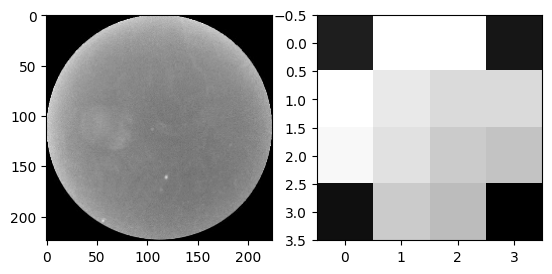

In [23]:
# Comparitive visualizations of original and resized image
fig, axes = plt.subplots(1, 2)
ax = axes.ravel()

ax[0].imshow(gray_img, cmap='gray')
ax[1].imshow(resized_img, cmap='gray')

## [2] Encoding Sample Image Using NEQR

#### [2.1] Developing the Quantum Circuit 

To encode the image pixels into qubits, we define quantum registers to store pixel positions and intensities. Each pixel value is denoted as the function $f(Y,X)$, where *Y* and *X* specify the position of the pixel in the image by row and column, respectively. 

In [24]:
# Import necessary libraries
import numpy as np 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

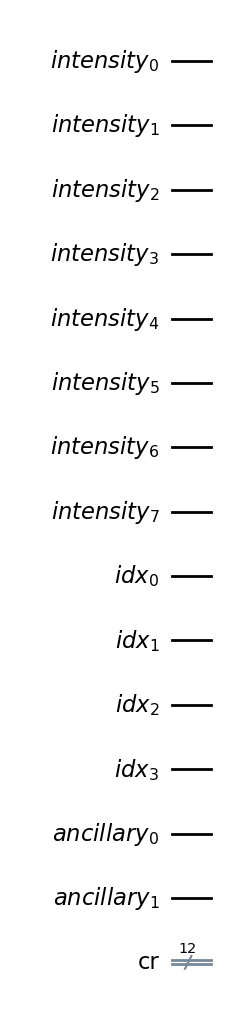

In [25]:
# Initialize the quantum circuit for the image 

# Pixel position (4 x 4)
idx = QuantumRegister(4, 'idx')

# Grayscale pixel intensity value 
intensity = QuantumRegister(8, 'intensity')

# Classical register 
cr = ClassicalRegister(12, 'cr')

# Ancillary Qubits
a = QuantumRegister(2, 'ancillary')

# Create quantum circuit
qc_img = QuantumCircuit(intensity, idx, a, cr)

# Set the total number of qubits 
num_qubits = qc_img.num_qubits

qc_img.draw("mpl")

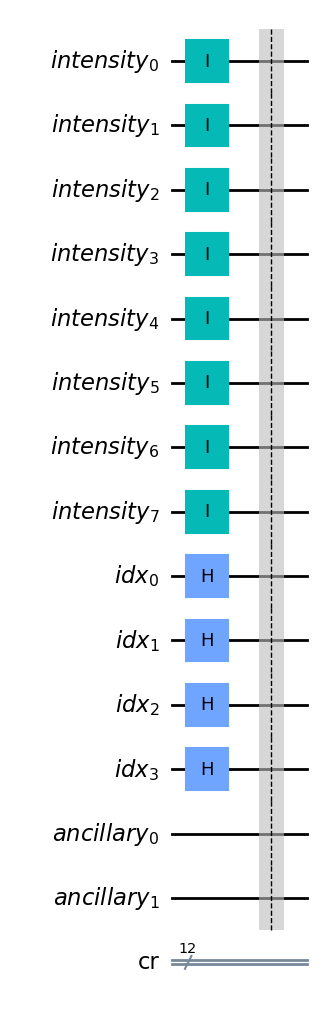

In [26]:
# Initialize the quantum circuit 

# Add Identity gates to the intensity qubits 
for idx in range(intensity.size):
    qc_img.i(idx)

# Add Hadamard gates to the pixel positions 
for i in range(8, 12):
    qc_img.h(i)

qc_img.barrier()
qc_img.draw("mpl")

#### [2.2] Representation of a Grayscale Image on a Quantum Circuit

The circuit is further prepared by combining the pixel position with its respective intensity value. 

In [27]:
# Observe the grayscale intensity values of the sample image
sample_img = resized_img
print(sample_img)

[[18 48 48 17]
 [48 45 43 43]
 [47 44 41 40]
 [16 41 39 14]]


In [28]:
# Helper function : 4 - CNOT Gate 
def cnot_4(qc, i, num_qubits):
    qc.ccx(num_qubits-1, 8, i)
    qc.ccx(9, num_qubits-2, num_qubits-1)
    qc.ccx(10, 11, num_qubits-2)
    qc.ccx(9, num_qubits-2, num_qubits-1)
    return qc


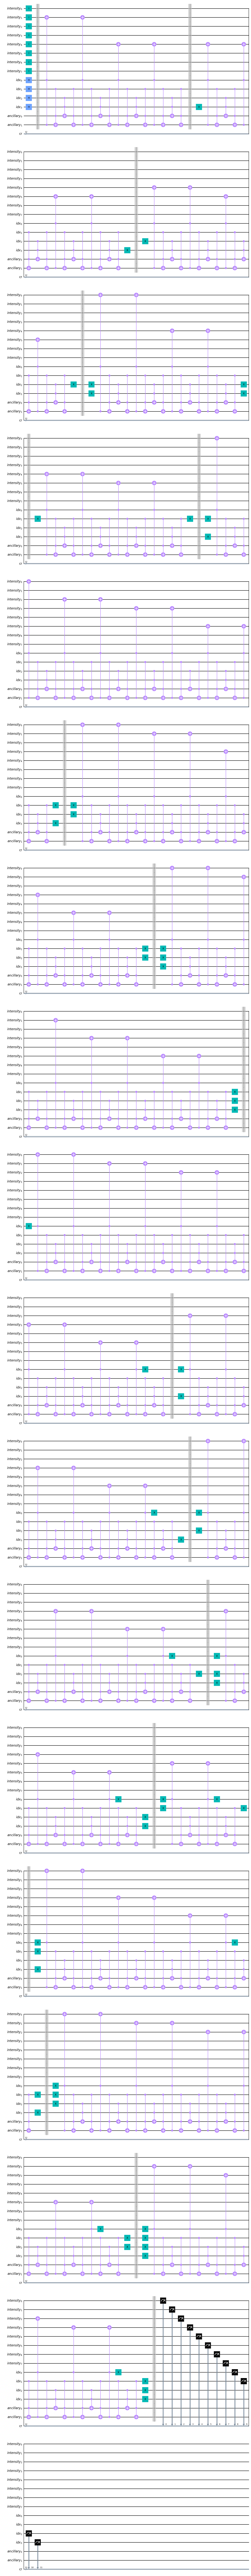

In [29]:
# NEQR - Encoding 
Y, X = sample_img.shape

# Iterate through the image assuming the pixel positions correspond to (Y,X)
for y in range(Y):
    for x in range(X):
            
        # If pixel intensity = 0; Apply I gates to all qubits
        if sample_img[y][x] == 0: 
            for idx in range(num_qubits):
                qc_img.i(idx)
            qc_img.barrier()
            continue 
            
        # Calculating pixel position in binary
        y_value = np.binary_repr(y, width=2)
        x_value = np.binary_repr(x, width=2)
        position = y_value + x_value

        # Setting the pixel position using X gates
        flag = 0
        for i in position:
            if i == '1':
                qc_img.x(8 + flag)
            flag += 1
            
        # Applying CNOT gates based on the grayscale values 
        gray_val = np.binary_repr(sample_img[y][x], width=8)

        for idx, px_value in enumerate(gray_val[::-1]):
            if(px_value == '1'):
                cnot_4(qc_img, idx, num_qubits)
                cnot_4(qc_img, idx, num_qubits)
        
        # Resetting the position using X gates
        flag = 0
        for i in position:
            if i == '1':
                qc_img.x(8 + flag)
            flag += 1

        qc_img.barrier()

qc_img.measure(range(12), range(12))
qc_img.draw("mpl")         

#### [2.3] Run on the Aer Simulator

In [32]:
from qiskit import Aer
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram

C:\Users\shlok\AppData\Local\Temp\ipykernel_6456\674992931.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job_neqr = aer_sim.run(qobj)


{'110100110000': 58, '100100101011': 63, '111000101111': 67, '001100010001': 74, '100000100111': 58, '000000001110': 55, '010000101001': 60, '111100010010': 59, '110000010000': 75, '101000101001': 67, '011000101100': 77, '000100101011': 57, '001000101000': 60, '011100110000': 61, '010100101101': 65, '101100110000': 68}


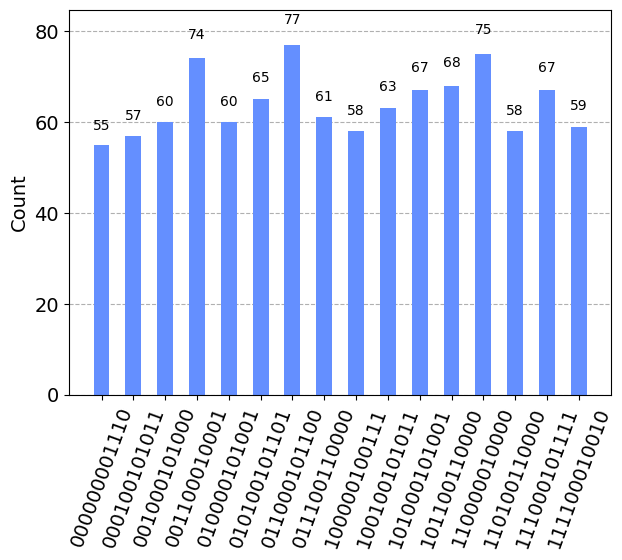

In [33]:
# Run on Aer simulator
aer_sim = Aer.get_backend('aer_simulator')
t_qc_img = transpile(qc_img, aer_sim)
qobj = assemble(t_qc_img, shots=1024)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()

print(counts_neqr)
plot_histogram(counts_neqr)

##### **Results Analysis** 

We note that the pixel positions are represented by the first four left-most bits (0000, 0001, ... , 1110, 1111). The remaining bit values represent the 8-bit binary representation of the grayscale intensity values encoded in NEQR.

## [3] References

[1] Zhang, Y., Lu, K., Gao, Y. et al. NEQR: a novel enhanced quantum representation of digital images. Quantum Inf Process 12, 2833–2860 (2013). https://doi.org/10.1007/s11128-013-0567-z

[2] Qiskit Textbook : Flexible Representation of Quantum Images (FRQI) and Novel Enhanced Quantum Representation (NEQR). [Link](https://learn.qiskit.org/course/ch-applications/flexible-representation-of-quantum-images-frqi)